# Develop an image classification model to
# distinguish between images of cats and dogs
# using data science techniques in Python.

In [ ]:
# https://www.kaggle.com/datasets/salader/dogs-vs-cats

In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [6]:
!kaggle datasets download -d salader/dogs-vs-cats

 98% 1.04G/1.06G [00:09<00:00, 122MB/s]
100% 1.06G/1.06G [00:09<00:00, 123MB/s]


In [7]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [8]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [9]:
#Generators
train_ds = keras.utils.image_dataset_from_directory (
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size =(256,256)

)

Found 20000 files belonging to 2 classes.


In [10]:
validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)

)

Found 5000 files belonging to 2 classes.


In [11]:
# Normalize

In [12]:
def process(image,label):
  image = tf.cast(image/255. , tf.float32)
  return image,label




In [13]:

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

# Create CNN model

In [14]:
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [15]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [17]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [18]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 79s 103ms/step - loss: 1.1873 - accuracy: 0.5943 - val_loss: 0.6318 - val_accuracy: 0.6550
Epoch 2/10
625/625 [==============================] - 66s 106ms/step - loss: 0.6149 - accuracy: 0.6862 - val_loss: 0.7645 - val_accuracy: 0.6352
Epoch 3/10
625/625 [==============================] - 67s 106ms/step - loss: 0.5275 - accuracy: 0.7404 - val_loss: 0.5325 - val_accuracy: 0.7344
Epoch 4/10
625/625 [==============================] - 65s 104ms/step - loss: 0.4558 - accuracy: 0.7878 - val_loss: 0.5811 - val_accuracy: 0.7602
Epoch 5/10
625/625 [==============================] - 66s 106ms/step - loss: 0.4006 - accuracy: 0.8233 - val_loss: 0.4737 - val_accuracy: 0.7800
Epoch 6/10
625/625 [==============================] - 66s 106ms/step - loss: 0.3300 - accuracy: 0.8531 - val_loss: 0.4171 - val_accuracy: 0.8098
Epoch 7/10
625/625 [==============================] - 68s 108ms/step - loss: 0.2596 - accuracy: 0.8889 - val_loss: 0.5540 - val_ac

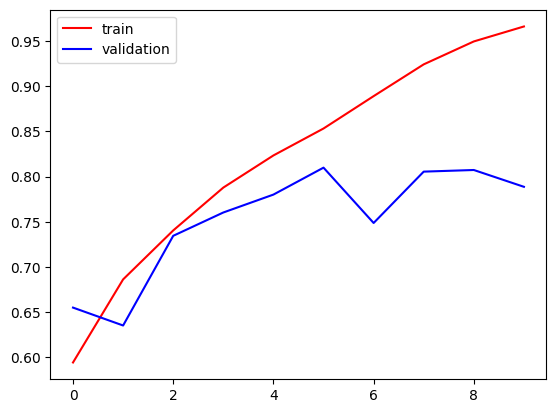

In [19]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

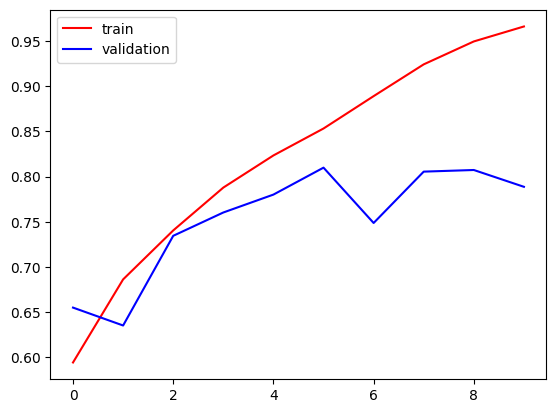

In [20]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

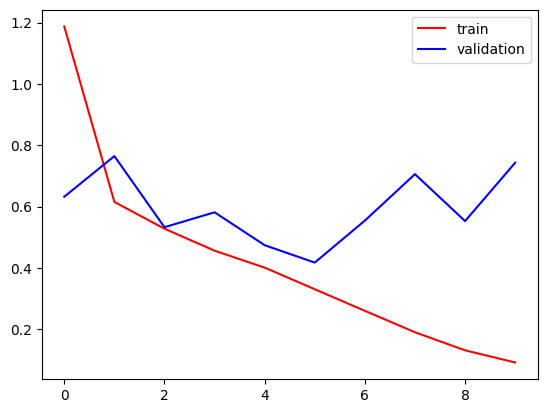

In [21]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

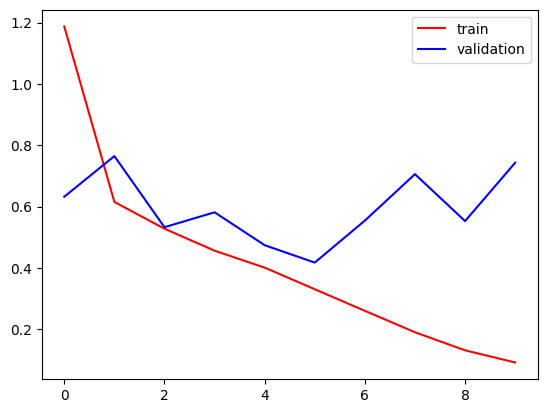

In [22]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [23]:
# ways to reduce overfitting

# Add more data
# Data Augmentation
# L1/L2 Regularizer
# Dropout
# Batch Norm
# Reduce complexity

In [42]:
import cv2

In [27]:
test_img = cv2.imread('/content/cat-551554_640.jpg')

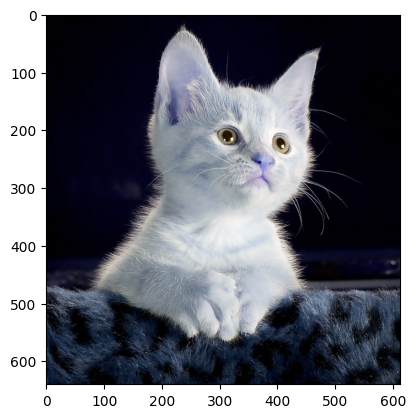

In [28]:
plt.imshow(test_img)

In [29]:
test_img.shape

(640, 612, 3)

In [30]:
test_img = cv2.resize(test_img,(256,256))

In [31]:
test_input = test_img.reshape((1,256,256,3))

In [32]:
model.predict(test_input)

1/1 [==============================] - 0s 354ms/step


array([[0.]], dtype=float32)

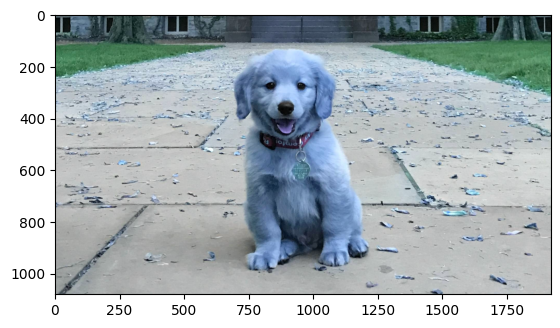

In [33]:
test_img = cv2.imread('/content/KOA_Nassau_2697x1517.jpg')
plt.imshow(test_img)

In [34]:
test_img.shape

(1080, 1920, 3)

In [35]:
test_img = cv2.resize(test_img,(256,256))

In [38]:
test_input = test_img.reshape((1,256,256,3))

In [39]:
model.predict(test_input)

1/1 [==============================] - 0s 72ms/step


array([[1.]], dtype=float32)